### 1. Load the data file using pandas. ###

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data = pd.read_csv('googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.shape

(10841, 13)

### 2.Check for null values in the data. Get the number of null values for each column.###

In [7]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [8]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 3. Drop records with nulls in any of the columns. ###

In [9]:
data = data.dropna()

In [10]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [11]:
data.shape

(9360, 13)

### 4(1) Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

### Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric. ###


In [12]:
data["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in data["Size"]  ]

In [13]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Extract the numeric value from the column ###

In [14]:
data["Size"] = 1000 * data["Size"]

In [15]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 4.(2)Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float). ###

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [17]:
data["Reviews"] = data["Reviews"].astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


### 4.(3)Installs field is currently stored as string and has values like 1,000,000+. ###

In [19]:
data["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in data["Installs"] ]

In [20]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1023.8+ KB


In [22]:
data["Installs"] = data["Installs"].astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.2+ KB


### 4.(4)Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric. ###

In [24]:
data['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in data['Price'] ]

In [25]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 987.2+ KB


In [27]:
data["Price"] = data["Price"].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   int32  
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 950.6+ KB


### 5 Sanity checks:

 ### 5(1) Average rating should be between 1 and 5 as only these values are allowed on the play store.
### Drop the rows that have a value outside this range. ###

In [29]:
data.shape

(9360, 13)

In [30]:
data.drop(data[(data['Reviews'] < 1) & (data['Reviews'] > 5 )].index, inplace = True)

In [31]:
data.shape

(9360, 13)

### 5 (2) Reviews should not be more than installs as only those who installed can review the app. 
### If there are any such records, drop them.

In [32]:
data.shape

(9360, 13)

In [33]:
data.drop(data[data['Installs'] < data['Reviews'] ].index, inplace = True)

In [34]:
data.shape

(9353, 13)

### 5(3) For free apps (type = “Free”), the price should not be >0. Drop any such rows. ###

In [35]:
data.shape

(9353, 13)

In [36]:
data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)

In [37]:
data.shape

(9353, 13)

### 5. Performing univariate analysis: 

### Boxplot for Price

### Are there any outliers? Think about the price of usual apps on Play Store.

In [38]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
sns.set(style='whitegrid')

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

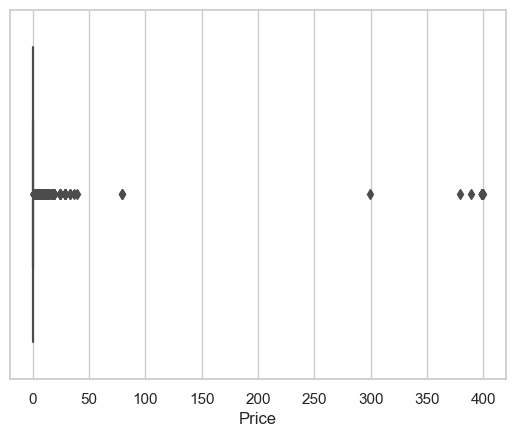

In [44]:
# Box Plot for Price
sns.boxplot(data['Price'])

### 5(2) Boxplot for Reviews

### Are there any apps with very high number of reviews? Do the values seem right?

C:\Users\Rakesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

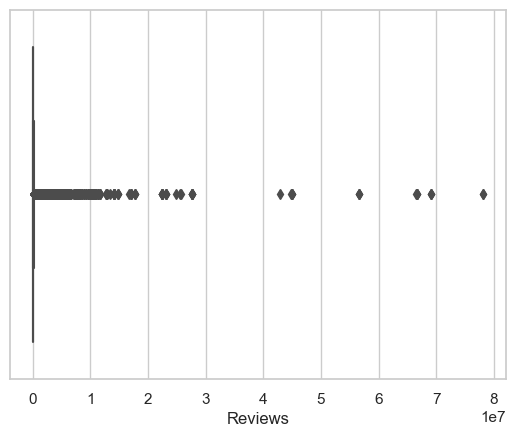

In [45]:
sns.boxplot(data['Reviews'])

### Histogram for Rating

### How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

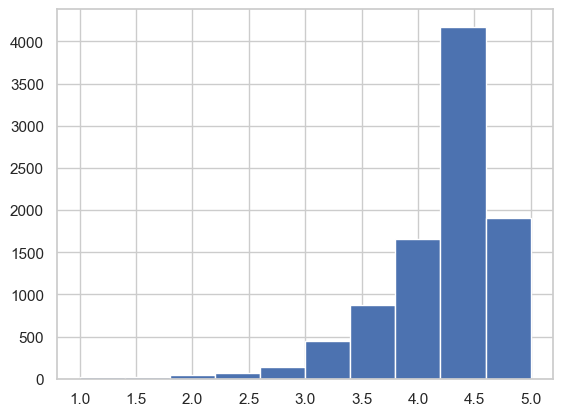

In [48]:
plt.hist(data['Rating'])

### 5(4) Histogram for Size

(array([4779., 1386., 1036.,  617.,  464.,  334.,  234.,  174.,  125.,
         204.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <BarContainer object of 10 artists>)

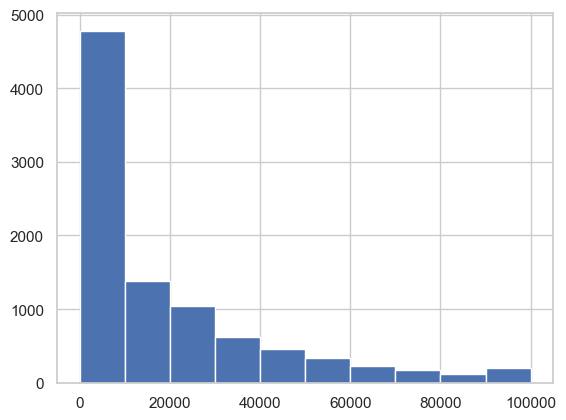

In [49]:
plt.hist(data['Size'])

### 6. Outlier treatment: 

### 6(1) Price: From the box plot, it seems like there are some apps with very high price.
### A price of $200 for an application on the Play Store is very high and suspicious!
### 6(I) Check out the records with very high price

### Is 200 indeed a high price?

In [50]:
data[data['Price']>200].index.shape[0]

15

### 6(II) Drop these as most seem to be junk apps

In [51]:
data.drop(data[data['Price']>200].index, inplace=True)

In [52]:
data.shape

(9338, 13)

### 6(2) Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. 
### Drop records having more than 2 million reviews.

In [53]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)

In [54]:
data.shape

(8885, 13)

### 6(3)Installs:  There seems to be some outliers in this field too.
### Apps having very high number of installs should be dropped from the analysis.

### Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [55]:
data.quantile([.1, .25, .5, .70, .90, .95, .99], axis = 0) 

,Rating,Reviews,Size,Installs,Price
0.10,3.5,18.00,0.0,1000.0,0.0
0.25,4.0,159.00,2600.0,10000.0,0.0
0.50,4.3,4290.00,9500.0,500000.0,0.0
0.70,4.5,35930.40,23000.0,1000000.0,0.0
0.90,4.7,296771.00,50000.0,10000000.0,0.0
0.95,4.8,637298.00,68000.0,10000000.0,1.0
0.99,5.0,1462800.88,95000.0,100000000.0,7.0


### 6(II) Decide a threshold as cutoff for outlier and drop records having values more than that

In [56]:
data.drop(data[data['Installs'] > 10000000].index, inplace = True)

In [57]:
data.shape

(8496, 13)

### 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating.
### Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### Make scatter plot/joinplot for Rating vs. Price

### What pattern do you observe? Does rating increase with price?

<AxesSubplot:xlabel='Rating', ylabel='Price'>

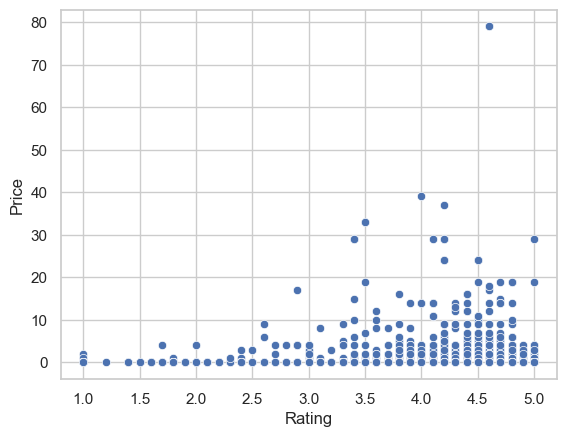

In [58]:
sns.scatterplot(x='Rating', y='Price', data=data)

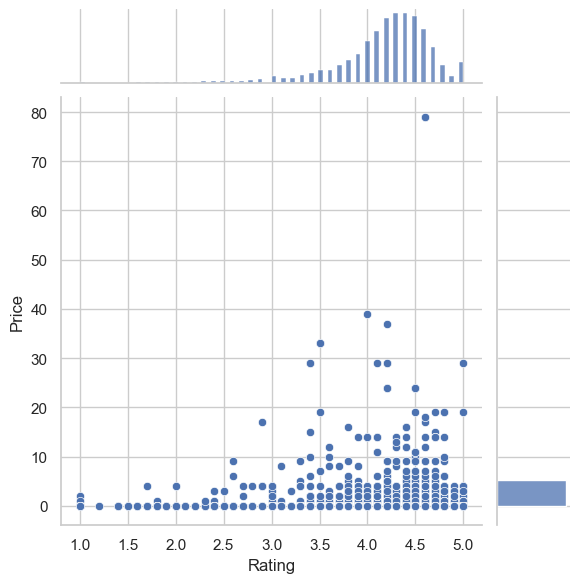

In [59]:
sns.jointplot(x= 'Rating',y= 'Price',data= data)

<AxesSubplot:xlabel='Rating', ylabel='Size'>

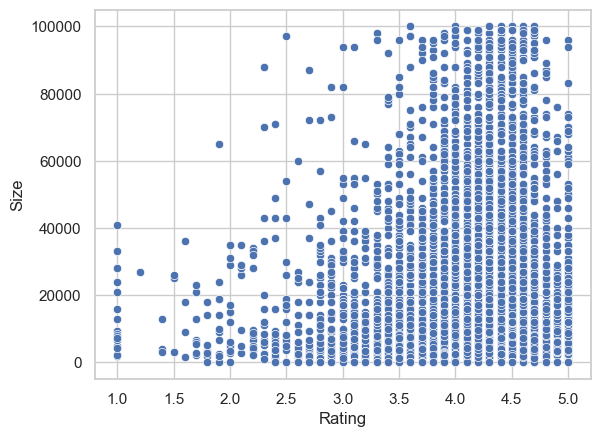

In [60]:
sns.scatterplot(x= 'Rating',y= 'Size', data = data)

### Make scatter plot/joinplot for Rating vs. Size

### Are heavier apps rated better?


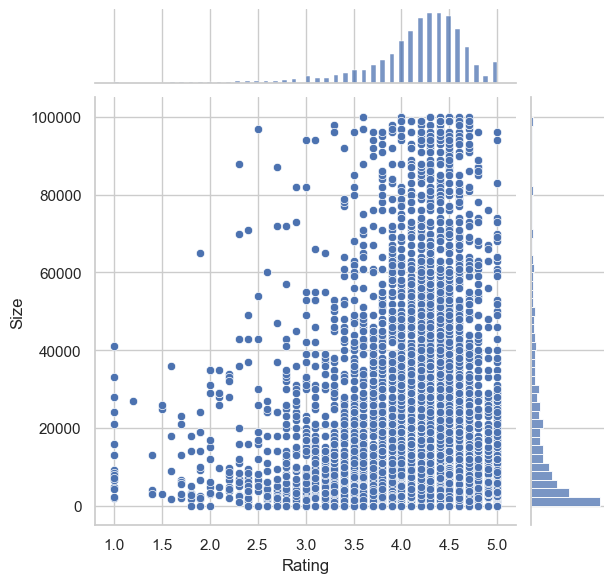

In [61]:
sns.jointplot(x= 'Rating', y= 'Size', data = data)

### Make scatter plot/joinplot for Rating vs. Reviews

### Does more review mean a better rating always?

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

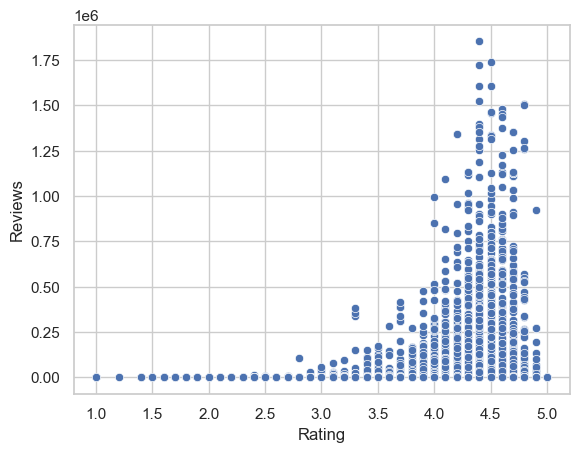

In [62]:
sns.scatterplot(x= 'Rating',y= 'Reviews', data = data)

### Make boxplot for Rating vs. Content Rating

### Is there any difference in the ratings? Are some types liked better?

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

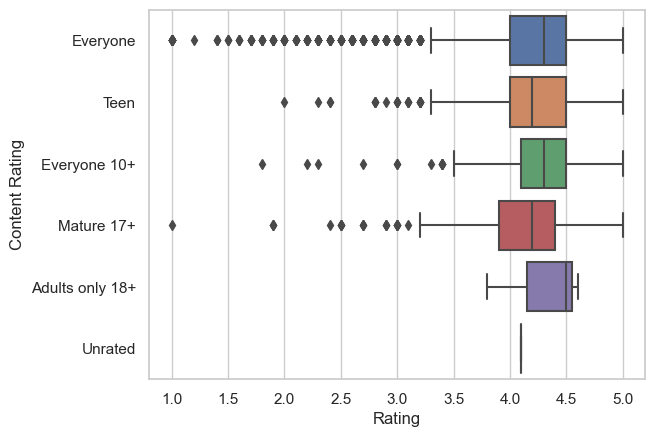

In [63]:
sns.boxplot(x= 'Rating', y= 'Content Rating', data = data)

### Make boxplot for Ratings vs. Category

### Which genre has the best ratings?

<AxesSubplot:xlabel='Rating', ylabel='Category'>

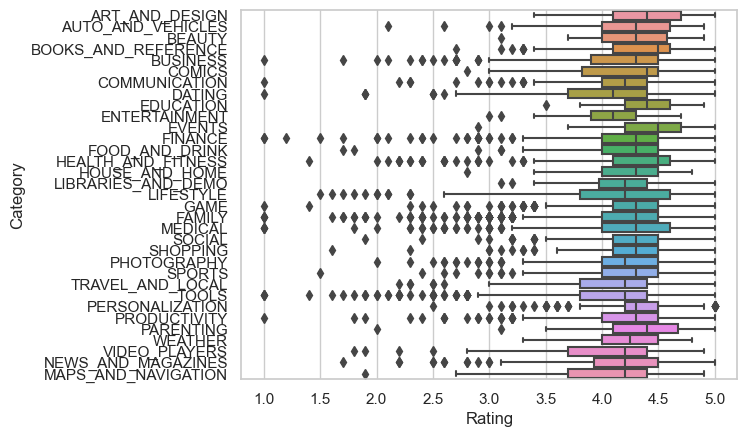

In [64]:
sns.boxplot(x= 'Rating', y= 'Category', data = data)

### 8. Data preprocessing

### For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

### (1) Reviews and Install have some values that are still relatively very high. 
### Before building a linear regression model, you need to reduce the skew. 
### Apply log transformation (np.log1p) to Reviews and Installs.

In [65]:
inp1 = data

In [66]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [67]:
inp1.skew()

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1348\3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.655917
Installs     1.543697
Price       18.074542
dtype: float64

In [68]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [69]:
reviewskew.skew()

-0.20039949659264134

In [70]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 

0           10000
1          500000
2         5000000
4          100000
5           50000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8496, dtype: int32

In [71]:
installsskew.skew()

-0.5097286542754812

In [72]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### 8(2) Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [73]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [74]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


In [75]:
inp1.shape

(8496, 8)

### 8(3) Get dummy columns for Category, Genres, and Content Rating. 
### This needs to be done as the models do not understand categorical data, and all data should be numeric. 
### Dummy encoding is one way to convert character fields to numeric.
### Name of dataframe should be inp2.

In [76]:
inp2 = inp1

In [77]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


In [78]:
###  Dummy EnCoding on Column "Category"
#get unique values in Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [79]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
inp2.shape

(8496, 40)

In [81]:
### Dummy EnCoding on Column "Genres"
#get unique values in Column "Genres"
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [82]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [83]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [84]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [85]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,10000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,Everyone,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
inp2.shape

(8496, 91)

In [87]:
### Dummy EnCoding on Column "Content Rating
#get unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [88]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

### 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [89]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [90]:
d1 = inp2
X = d1.drop('Rating',axis=1)
y = d1['Rating']

Xtrain, Xtest, ytrain, ytest = tts(X,y, test_size=0.3, random_state=5)

### 11 . Model building

### Use linear regression as the technique

### Report the R2 on the train set

In [91]:
reg_all = LR()
reg_all.fit(Xtrain,ytrain)

LinearRegression()

In [92]:
R2_train = round(reg_all.score(Xtrain,ytrain),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.074


### 12. Make predictions on test set and report R2.

In [93]:
R2_test = round(reg_all.score(Xtest,ytest),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.063
